## Helper

In [1]:
import wandb 
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
select_group  = lambda runs,group:[run for run in runs if run.group == group]
def calc_mean_std_auc(runs_for_auc):
    auc = [runs.history()["auc"].dropna() for runs in runs_for_auc]
    return round(np.array(auc).mean(),3),round(np.array(auc).std(),3)

def plot_loss(runs,metric="loss"):
    if metric == "loss":
        metric_train = "Loss train"
        metric_val = "Loss val"
        label = "Loss"
    elif metric == "auc":
        metric_train = "auc_train"
        metric_val = "auc_val"
        label = "Auc"
    loss_train_val = pd.concat([run.history().loc[:,[metric_train,metric_val,"epoch"]].dropna() for run in runs])
    mean_std = loss_train_val.groupby("epoch").agg(["mean","std"])
    mean_std.reset_index(inplace=True)
    df_melted = mean_std.melt(id_vars='epoch', var_name='Metric', value_name='Value')

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plot = sns.lineplot(x='epoch', y='Value', hue='Metric', style='Metric', markers=True, data=df_melted)
    plot.set(xlabel='Epoch', ylabel=label, title=f'{label} Train vs. {label} Validation')
    plt.legend(title='Data', loc='upper right')
    plt.show()
    
def plot_auc(runs_diff_group):
    auc_values_list = [[run.history()["auc"].dropna().values[0] for run in runs] for runs in runs_diff_group]
    names = [runs[0].group for runs in  runs_diff_group]
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    for i, auc_values in enumerate(auc_values_list):
        stripplot = sns.stripplot(x=[i] * len(auc_values), y=auc_values, jitter=False, dodge=False, alpha=1, size=8)
        sns.pointplot(x=[i] * len(auc_values), y=auc_values, errorbar="sd", markers="o", capsize=0.2, label=names[i])

    # Draw a horizontal line at 0.5
    plt.axhline(y=0.5, color='red', linestyle='--', label='Random (0.5)')

    # Customize the plot
    plt.xticks(range(len(auc_values_list)), [names[i] for i in range(len(auc_values_list))])
    plt.xlabel('Runs')
    plt.ylabel('AUC')
    plt.title('AUC-values with 1 standard deviation')
    plt.ylim(0, 1)  # Set y-axis limits to start from 0 and go up to 1
    plt.legend()
    plt.show()

## MRI

In [3]:
runs = wandb.Api().runs(f"pro5d-classification-prolactinoma/MRI-Modell")
baseline_mlp_runs = select_group(runs,"Baseline MLP")
baseline_mlp_test_runs = select_group(runs,"Baseline_MLP_Test") 

baseMed3d_weighted = select_group(runs,"BaseMed3d_weighted")

baseline_resnet = select_group(runs,"Baseline Resnet")
resnet_weighted  = [run for run in select_group(runs,"Weighted") if run.config["model architecture"] == "Resnet 18"]


resnet_augmented_weighted = select_group(runs,"Augmented_weighted")
resnet_augmented_weighted_freezed = select_group(runs,"Augmented_weighted_freezed")

resnet_augmented_weighted_test  = select_group(runs,"Augmented_weighted_Test")

## Baseline MLP

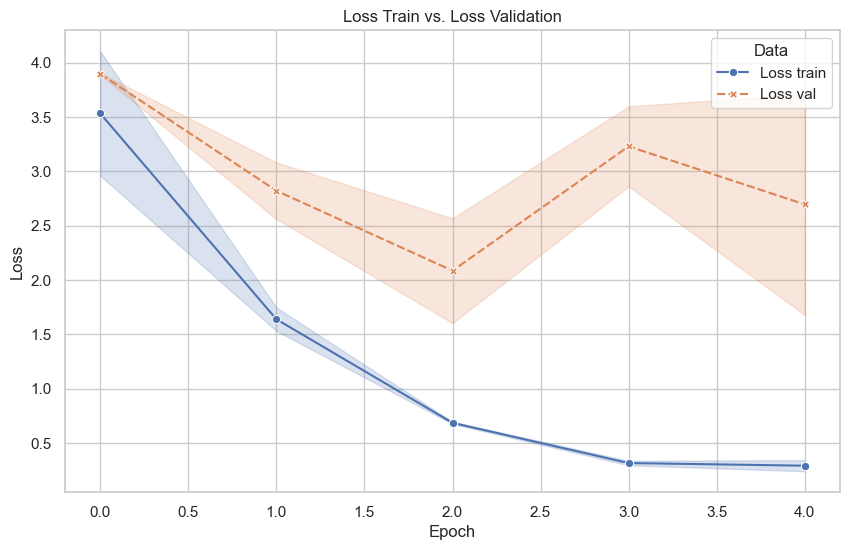

In [9]:
plot_loss(baseline_mlp_runs,"loss")

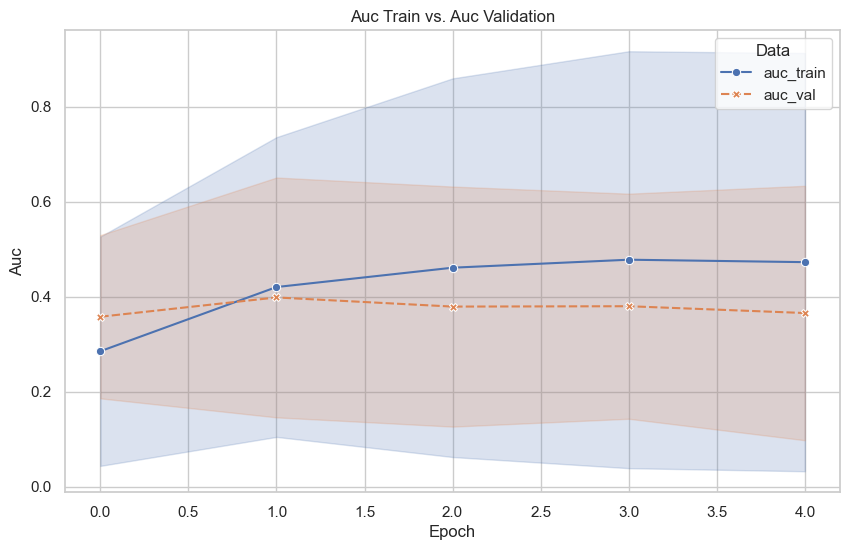

In [10]:
plot_loss(baseline_mlp_runs,"auc")

+ ROC Curve Test

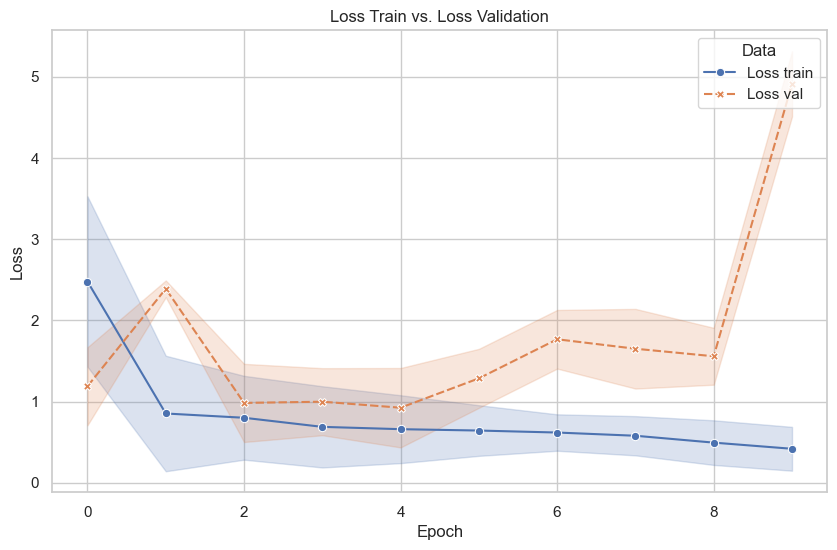

In [5]:
plot_loss(baseMed3d_weighted)

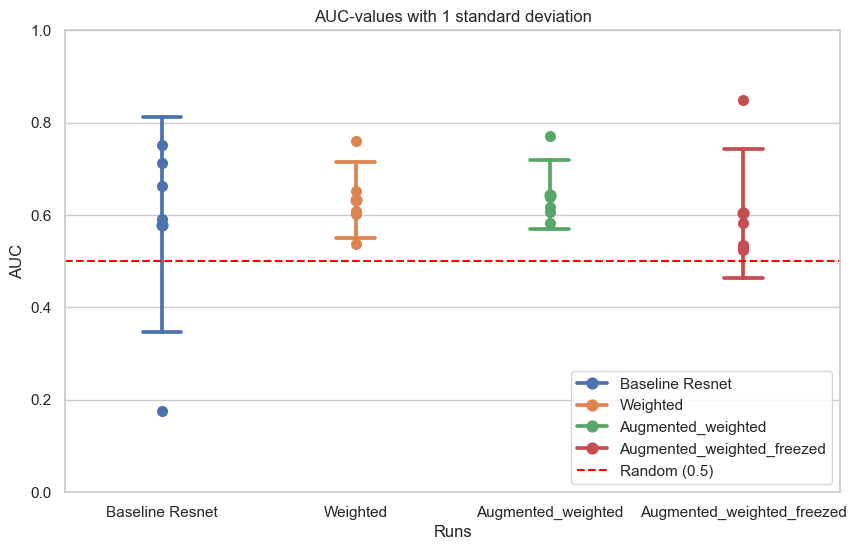

In [4]:
plot_auc([baseline_resnet,resnet_weighted,resnet_augmented_weighted,resnet_augmented_weighted_freezed])

## LAB